# Agenda

- Discussion of tree based methods

- Regression Trees

- Classification Trees

- Entropy, Information Gain and Gini Impurity.

- Practice with sklearn




# Part-I: Tree Based Models

- Recall predictors (features or X) vs target (dependent variable, Y)
- Goal in tree based methods: Segmenting the predictor space into a number of simple regions.

## Regression Trees

__Dataset: Baseball Players__



In [1]:
import utils  # a utility script that reads data from google-drive
import pandas as pd 

URL = "https://drive.google.com/file/d/1oryMiwQ6N5kchQHwMsBPL5CrNd089Ha_/view?usp=sharing"
raw = utils.get_data_from_drive(url = URL) # raw is StringIO object
hitters_df = pd.read_csv(raw)[["Hits","Years","Salary" ]]
raw.close() #closing the file 

# Check the dataset

263 Baseball players.
- Hits: The number of hits that a player made in the previous year

- Years: The number of years that a player has played in the major leagues

__Fitting a regression tree with Scikit-Learn__


<div class="alert alert-block alert-warning">
<b>Note:</b> We didn't applied train-test-split and validation purposes for the sake of class time and not making things more complicated for the introduction of a new concept. In your projects, make sure you apply best practices of data preparation.
</div>

In [2]:
import numpy as np
from sklearn import tree

#creating X,y data

#log_transformation of y 

#instantiating estimator and fitting



In [3]:
#drawing tree structure.

#terminology:  Root, terminal_nodes(leaves), branches, regions

__Another way of seeing things__

<img src= "images/partition_of_set.png" style="height:250px">


In [4]:
player1 = {"Hits": 110, "Years": 2}
player2 = {"Hits": 110, "Years": 10}
player3 = {"Hits": 200, "Years": 2}
player4 = {"Hits": 200, "Years": 10}

#use estimator to make predictions too

__Pseudo-Algorithm for decision trees__

1. Divide the predictor space into $J$ distinct and non-overlapping regions (each denoted by $R_{i}$) (partitions)

2. For every new observation in a region $R_{i}$ we make a prediction. Generally by taking the average of the training obervations in $R_{i}$

__Question__

- How to find a 'good' partition?

__Objective Function (Cost Funtion) (RSS)__

To find boxes $R_{1},R_{2}, \cdots, R_{J}$ that minimize the RSS:

<img src= "images/dt_least_square.png" style="height:100px">


__Some challenges in implementation__

__Final Algorithm__
 
- Start with a variable and division that gives the greatest possible reduction in RSS

- Continue this approach but only check the RSS in resulting regions.

- Stop with a predetermined stopping criteria.



<img src= "images/Partition_with_5_boxes_ISLR.png" style="height:300px">

<img src= "images/graph_of_partition_with_5_boxes.png" style="height:300px">


__Play Ground__

- Now divide the predictor space into 5 region and estimate the salaries of player1, player2, ..., player4.

__Discussion__

# Classification Trees


1. Divide the predictor space into $J$ distinct and non-overlapping regions (each denoted by $R_{i}$) (partitions)

2. For every new observation in a region $R_{i}$ we make a prediction. Generally by taking the average of the training obervations in $R_{i}$

__More Specifically__

 
- Start with a variable and division that gives the greatest possible reduction in RSS

- Continue this approach but only check the RSS in resulting regions.

- Stop with a predetermined stopping criteria.

__More Specifically__

 
- Start with a variable and division that gives the greatest possible reduction in ---

- Continue this approach but only check the --- in resulting regions.

- Stop with a predetermined stopping criteria.

__Toy Dataset__


In [5]:
import pandas as pd
customers= pd.DataFrame([[45000, 1000, True, 2, False], [70000, 100, True, 10, True],
             [30000, 2000, False, 0, False], [90000, 500, True, 2, True],
             [70000, 200, True, 5, False]],
            columns=['salary', 'total_bill', 'club_member', 'years_post-sec_ed',
                    'paid'])
customers

,salary,total_bill,club_member,years_post-sec_ed,paid
0,45000,1000,True,2,False
1,70000,100,True,10,True
2,30000,2000,False,0,False
3,90000,500,True,2,True
4,70000,200,True,5,False


## Entropy and Information Gain

The goal is to have our ultimate classes be fully "ordered" (for a binary dependent variable, we'd have the 1's in one group and the 0's in the other). So one way to assess the value of a split is to measure how *disordered* our groups are, and there is a notion of *entropy* that measures precisely this.

The entropy of the whole dataset is given by:

$\large E = -\Sigma_i p_i\log_2(p_i)$,

where $p_i$ is the fraction of the $i$th group after a splitting.

**Entropy will always be between 0 and 1. The closer to 1, the more disordered your group.**

To repeat, in the present case we have only two groups of interest: the payers (2/5) and the non-payers (3/5).

At the root:

- $p_{0} = ?$

- $p_{1} = ?$

- $E = ? $

(Let's use the ```math``` library to calculate this:)

In [6]:
## use log from math to calculate E

To calculate the entropy of a *split*, \

- calculate the entropy of each of the groups made by the split,
- calculate a weighted average of those groups' entropies

Suppose we made a splitting such that `salary<60K`

- Left Leaf = 1:1

- Right Leaf = 1:2



In [7]:
## calculate left_leaf's entropy

## calculate the right leaf's entropy

## calculate the weighted average

__Information Gain__


For a given split, the **information gain** is simply the entropy of the parent group less the entropy of the split.

For a given parent, then, we maximize our model's performance by *minimizing* the split's entropy.

What we'd like to do then is:

1. to look at the entropies of all possible splits, and
2. to choose the split with the lowest entropy.

In practice there are far too many splits for it to be practical for a person to calculate all these different entropies ...

... but we can make computers do these calculations for us!

__Gini Impurity Measure__

$\large G = 1 - \Sigma_i p_{i}^2$,

Where $p_{i}$ is the fraction of items labeled with class $i$ in the set.

__Pros:__
- Easy to Understand
- Useful in Data exploration
- Less data cleaning required
- Data type is not a constraint
- Non Parametric Method


__Cons:__
- Prone to over-fitting
- Struggles with creating cut-off splits with continuous variables

__Play Ground__

- If time allows let's see `Classification Trees` in action.

- If not, work with this part on your own.

__Dataset__



In [8]:
URL = "https://drive.google.com/file/d/1S-r_DiKQMQnjMEB0a8OGRvElIqTixNIH/view?usp=sharing"
raw = utils.get_data_from_drive(url = URL)

data = pd.read_csv(raw)
data.rename(columns={'ï»¿age': 'age'}, inplace = True)


X = data.drop('target', axis = 1)
y = data['target']

categorical_variables = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

continuous_variables = [i for i in data.columns.tolist() if i not in categorical_variables]
continuous_variables.remove('target')

heart_df = utils.heart_data_ohe(categorical_variables, continuous_variables, X)

heart_df.head(2)

,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,...,ca_3,ca_4,thal_1,thal_2,thal_3,age,trestbps,chol,thalach,oldpeak
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,63.0,145.0,233.0,150.0,2.3
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,37.0,130.0,250.0,187.0,3.5


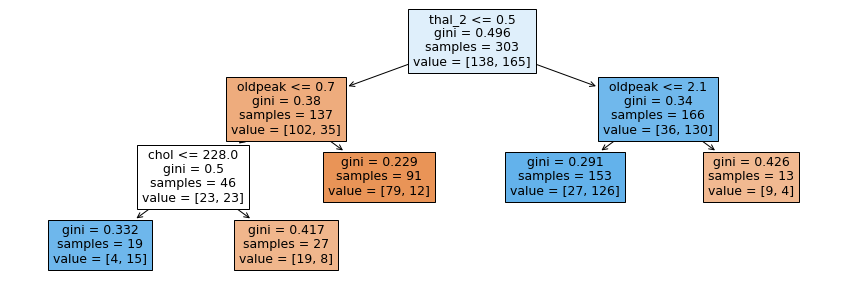

In [9]:
## here let's apply sklearn DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(max_leaf_nodes= 5)
clf.fit(heart_df,y)
utils.draw_tree(clf,feature_names= heart_df.columns)

# Resources

[Chapter-8 of ISLR](https://faculty.marshall.usc.edu/gareth-james/ISL/)

Q: what is information gain criteria? 

[Watch this video](https://www.youtube.com/watch?v=LDRbO9a6XPU)

Q: What is ID3, C4.5 and CART?

[sklearn documentation 1.10.6](https://scikit-learn.org/stable/modules/tree.html)

Q: What are the tricky things that we should watch out in application?

[sklearn documentation 1.10.5 - Tips on Practical Use](https://scikit-learn.org/stable/modules/tree.html)

Q: Can sklearn plot the structure of a decision tree?

[Check this blog? I didn't fully read this though](https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176)

More readings:


[A chapter from another book. - Looks friendly :)](https://www-users.cs.umn.edu/~kumar001/dmbook/ch4.pdf)

[What is the difference btwn 'mse' vs 'friedman_mse'](https://projecteuclid.org/euclid.aos/1013203451)

[Categorical Variables with sklearn-trees](https://stackoverflow.com/questions/24715230/can-sklearn-random-forest-directly-handle-categorical-features)

"Some of the figures in this presentation are taken from "An Introduction to Statistical Learning, with applications in R"  (Springer, 2013) with permission from the authors: G. James, D. Witten,  T. Hastie and R. Tibshirani " 